# Small models with tensorflow

This Practical session is about getting started with tensorflow elementary concepts. You have to know things about fitting models (most of the models are simple linear models though). These models are supposed to be super easy to help you to understand basic stuff.



This is all written in tensorflow2, so please, always check the version used in forums and documentations because there are a lot of differences between 1.X and 2.X version. We are only working in eager mode here, check the differences between graph mode and eager mode in tf.



You should read carefuly the [tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf?hl=fr)

### Import

You won't have to do anything here, just press the play button of the cells.

In [1]:
%reset -f

In [2]:
import numpy as np
import os
import sklearn.linear_model
import tensorflow as tf
"reset tensorflow computation tree"
tf.compat.v1.reset_default_graph()

import matplotlib.pyplot as plt
plt.style.use("default")

np.set_printoptions(linewidth=500,precision=2,suppress=True)

"do not look at this function otherwise you spoil an exercise"
def generate_nid(prop=(1,1,1)):
    nb_data=1000
    prop=np.array(prop)
    proba=prop/prop.sum()
    cats=np.random.choice(a=[0,1,2],p=proba,size=nb_data)
    
    cat_0=(cats==0)
    cat_1=(cats==1)
    cat_2=(cats==2)
    
    y=np.empty(nb_data)
    y[cat_0]=np.random.normal(loc=45,scale=5.123,size=np.sum(cat_0))
    y[cat_1]=np.random.normal(loc=16,scale=1.123,size=np.sum(cat_1))
    y[cat_2]=np.random.normal(loc=32,scale=3.123,size=np.sum(cat_2))
    
    y=np.maximum(y,0)
    
    return y

## Linear regression

We'll be using the '@' operator multiple times in this notebook. It's a way to perform matrix product. Check on the tensorflow or numpy documentation to understand what it does.

###Create data

Everything is done for you here

In [3]:
# Real values of the parameters to estimate
real_a = np.array([3.,4.]).reshape((2,1))
real_b = 1.

# function to create a noisy dataset
def gen_data(n_samples, a, b):
    """generation process:
       Y =  X @ a + b + bruit
        """
    X = np.random.normal(size=(n_samples, 2))
    Y = X @ a + b + np.random.normal(loc=0, scale=0.1, size=(n_samples, 1))
    return X, Y


X, Y = gen_data(100, real_a, real_b)

print("X shape: {}; Y shape: {}".format(X.shape, Y.shape))

X shape: (100, 2); Y shape: (100, 1)


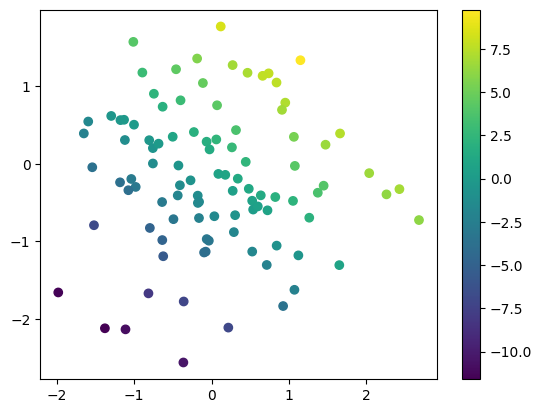

In [4]:
fig, ax = plt.subplots()
mappable = ax.scatter(X[:,0], X[:,1], c=Y[:,0]);
fig.colorbar(mappable);

###Use tensorflow for linear regression

As a convention, I will write all Tensorflow Tensors with an underscore at the beginning. So you won't mess them up with numpy arrays. Plz, try to do the same, it will help I swear.

From here you'll often have things to do (everywhere you find '...' or an empty cell) 

value of parameter 'a': [[7.]
 [3.]]
value of parameter 'b': 6.00000524520874
value of REAL parameter 'a': [[3.]
 [4.]]
value of REAL parameter 'b': 1.0


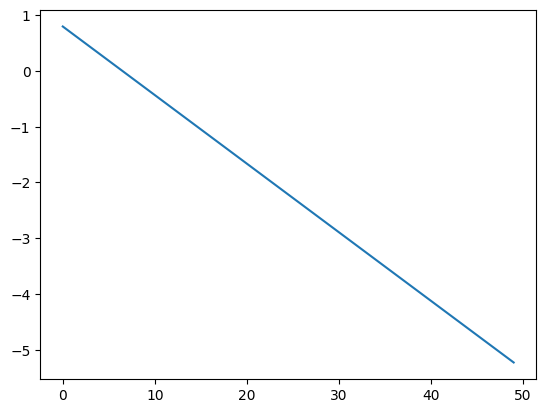

In [5]:
# Initialize trainable variables of the model
_a = tf.Variable([[2.],[8.]])
_b = tf.Variable(1.)

# Create the minimizer
# Nothing to be done here
trainProcess = tf.keras.optimizers.Adam(0.1)

# Train the model
loss_record = []
for epoch in range(50):
  # This statement is absolutely necessary to RECORD GRADIENTS of operations below
  with tf.GradientTape() as tape:
    # Model equation (use '@' operator)
    _estimation = X @ _a + _b
    # Compute error vector (mean squared error)
    _error = Y - _estimation
  # record the loss
  loss_record.append(_error.numpy().mean())
  # get the gradients of your model
  _grads = tape.gradient(_error, [_a, _b])
  # update your model by applying computed gradients
  trainProcess.apply_gradients(zip(_grads, [_a, _b]))

# plot loss record, estimations of 'a', 'b' next ot real values of 'a' and 'b'
print("value of parameter 'a': {}".format(_a.numpy()))
print("value of parameter 'b': {}".format(_b.numpy()))
print("value of REAL parameter 'a': {}".format(real_a))
print("value of REAL parameter 'b': {}".format(real_b))
plt.plot(loss_record)

##Classification

###Create a classification dataset

In [6]:
from sklearn.datasets import make_moons
def gen_moon_data(n_samples=1000):
  """The moons dataset using Scikit-Learn package :-)
  """
  X, Y = make_moons(n_samples, noise=0.1, random_state=42)
  Y = Y[:,np.newaxis]
  return X, Y

X, Y = gen_moon_data()

print("X shape: {}; Y shape: {}".format(X.shape, Y.shape))

X shape: (1000, 2); Y shape: (1000, 1)


####Split in training and validation

In [7]:
def split_dataset(X, Y, ratio=0.2):
  """Ratio*len(dataset) samples are used for validation
  """
  val_size = int(len(X) * ratio)
  X_train = X[:-val_size]
  Y_train = Y[:-val_size]

  X_val = X[-val_size:]
  Y_val = Y[-val_size:]

  return (X_train, Y_train), (X_val, Y_val)

training, validation = split_dataset(X, Y)
print("Training set has {} elements".format(len(training[0])))
print("Validation set has {} elements".format(len(validation[0])))

Training set has 800 elements
Validation set has 200 elements


####Check/plot the dataset

(399, 2)
(399,)
(399,)


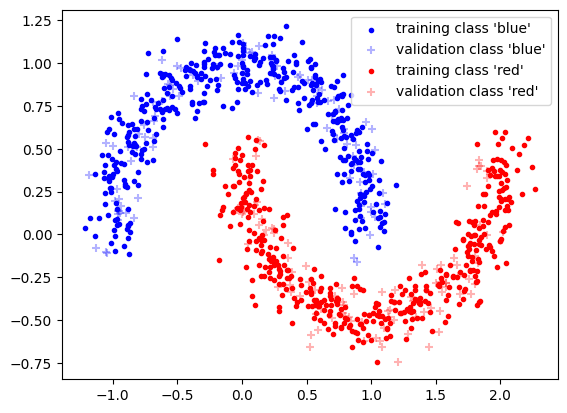

In [8]:
X_train, Y_train = training
X_val, Y_val = validation

fig, ax = plt.subplots()

blue_points_train = X_train[Y_train[:, 0] == 0]
print(blue_points_train.shape)
x_blue_train = blue_points_train[:, 0]
y_blue_train = blue_points_train[:, 1]
print(x_blue_train.shape)
print(y_blue_train.shape)

blue_points_valid = X_val[Y_val[:, 0] == 0]
x_blue_valid = blue_points_valid[:, 0]
y_blue_valid = blue_points_valid[:, 1]

red_points_train = X_train[Y_train[:, 0] == 1]
x_red_train = red_points_train[:, 0]
y_red_train = red_points_train[:, 1]

red_points_valid = X_val[Y_val[:, 0] == 1]
x_red_valid = red_points_valid[:, 0]
y_red_valid = red_points_valid[:, 1]

ax.scatter(x_blue_train, y_blue_train, c="blue", marker=".", label="training class 'blue'");
ax.scatter(x_blue_valid, y_blue_valid, c="blue", marker="+", alpha=0.3, label="validation class 'blue'");
ax.scatter(x_red_train, y_red_train, c="red", marker=".", label="training class 'red'");
ax.scatter(x_red_valid, y_red_valid, c="red", marker="+", alpha=0.3, label="validation class 'red'");
plt.legend()

####Create batches to implement a 'fit on batches' procedure

In [9]:
def get_random_batch(X_train, Y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    Y_batch = Y_train[rnd_indices]
    return X_batch, Y_batch

In [10]:
# batch example:
batch_size = 5
X_batch_example, Y_batch_example = get_random_batch(X_train, Y_train, batch_size)
print("Shape of a X_train batch of size {}: {}".format(batch_size, X_batch_example.shape))
print("Shape of a Y_train batch of size {}: {}".format(batch_size, Y_batch_example.shape))

Shape of a X_train batch of size 5: (5, 2)
Shape of a Y_train batch of size 5: (5, 1)


###Design a simple linear model

We choose to estimate probability of belonging to the 'red' class (class == 1) by:

$$
estimation = \sigma(X \cdot w +b)
$$

Where $\sigma$ is the sigmoïd function.

In [11]:
X.shape

(1000, 2)

value of parameter 'a': [[1.7 ]
 [3.78]]
value of parameter 'b': -1.535854458808899
value of REAL parameter 'a': [[3.]
 [4.]]
value of REAL parameter 'b': 1.0


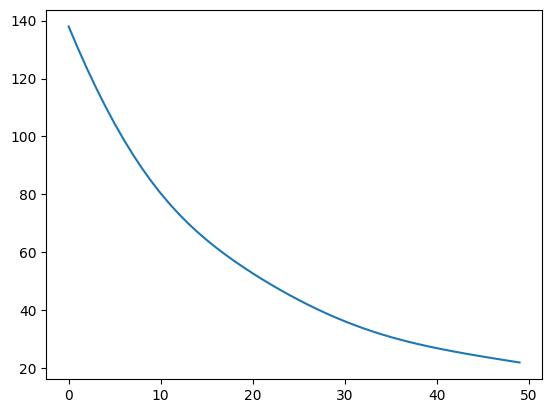

In [12]:
# Initialize trainable variables of the model
_a = tf.Variable([[2.],[8.]])
_b = tf.Variable(1.)

# Create the minimizer
# Nothing to be done here
trainProcess = tf.keras.optimizers.Adam(0.1)

# Train the model
loss_record = []
for epoch in range(50):
  # This statement is absolutely necessary to RECORD GRADIENTS of operations below
  with tf.GradientTape() as tape:
    # Model equation (use '@' operator)
    _estimation = X @ _a + _b
    # Compute error vector (mean squared error)
    _error = tf.reduce_sum(tf.square(_estimation - Y)) / (2*100)
  # record the loss
  loss_record.append(_error.numpy().mean())
  # get the gradients of your model
  _grads = tape.gradient(_error, [_a, _b])
  # update your model by applying computed gradients
  trainProcess.apply_gradients(zip(_grads, [_a, _b]))

# plot loss record, estimations of 'a', 'b' next ot real values of 'a' and 'b'
print("value of parameter 'a': {}".format(_a.numpy()))
print("value of parameter 'b': {}".format(_b.numpy()))
print("value of REAL parameter 'a': {}".format(real_a))
print("value of REAL parameter 'b': {}".format(real_b))
plt.plot(loss_record)

In [13]:
# Following the design used for previous linear regression, set the trainable variables of your model
# (W, b) in the equation

_w = tf.Variable([[1.],[5.]])
_b = tf.Variable(1.)

In [14]:
# Following previous equation, create a function 'estimate' that compute the estimation given a batch X
# tf has a sigmoid function of course...

def estimate(X):
  with tf.GradientTape() as tape:
      _estimation = tf.sigmoid(X @ _w + _b)
  return _estimation

#####Loss

$loss = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y_i \log\left(\hat{p}_i\right) + (1 - y_i) \log\left(1 - \hat{p}_i\right)\right]}$

In [15]:
# Create a function 'compute_loss' that, given an estimation and the groud_truth Y of a batch, produces a loss value
# We choose the binary cross-entropy for the loss function
# Find information on the cross-entropy on wikipedia
# You can compute the loss by yourself with tf operations (bonus)
# Or you can simply use the 'binary_crossentropy' function from tf.losses
def compute_loss(e, y):
  bce = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, label_smoothing=0.0, axis=-1,
    name='binary_crossentropy'
  )
  return bce(e, y)

value of parameter 'w': [[2.73]
 [4.26]]
value of parameter 'b': 1.9718316793441772


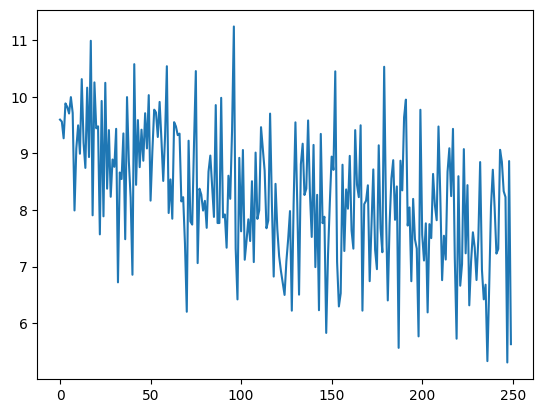

In [16]:
# Based on previous training loop, build your own to fit your linear model on the moon dataset
# An interesting set of parameters is:
# - batchsize = 50
# - n_epoch = 250
# - trainProcess = tf.keras.optimizers.SGD(0.01)
# Feel free to explore better settings

# Create the minimizer
trainProcess = tf.keras.optimizers.SGD(0.01)

# Train the model
loss_record = []
for epoch in range(250):
  # draw a random batch to fit on
  X, Y = get_random_batch(X_train, Y_train, 50)
  Y = Y.astype(float)
  with tf.GradientTape() as tape:
    # Model equation (use '@' operator)
    _estimation = estimate(X)
    # Compute error vector (mean squared error)
    _error = compute_loss(_estimation, Y)
  # record the loss
  loss_record.append(np.mean(_error))
  # get the gradients of your model
  _grads = tape.gradient(_error, [_w, _b])
  # update your model by applying computed gradients
  trainProcess.apply_gradients(zip(_grads, [_w, _b]))

# plot loss record, estimations of 'a', 'b' next ot real values of 'a' and 'b'
print("value of parameter 'w': {}".format(_w.numpy()))
print("value of parameter 'b': {}".format(_b.numpy()))
plt.plot(loss_record)

#####Check/plot the result and see separation drawn by the model

(2500, 2)


Text(0.5, 1.0, 'Model is just too simple')

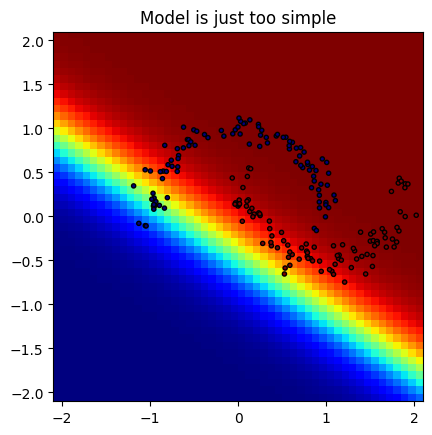

In [17]:
# Why is the fitting so bad ?

xx0 = np.linspace(-2.1,2.1,50)
xx1 = np.linspace(-2.1,2.1,50)
XX0, XX1 = np.meshgrid(xx0, xx1)
length = len(XX0.reshape(-1))
XX01 = np.stack([XX0.reshape(-1), XX1.reshape(-1)], axis=1)
print(XX01.shape)

hat_Y_proba = estimate(XX01).numpy()
hat_Y_proba = hat_Y_proba.reshape(XX0.shape)

fig, ax = plt.subplots()
ax.imshow(hat_Y_proba, interpolation="nearest", origin="lower", cmap="jet", extent=[-2.1, 2.1, -2.1, 2.1])
ax.scatter(X_val[:,0], X_val[:,1], c=Y_val[:,0], cmap="jet", marker=".", edgecolors="k");
ax.set_title("Model is just too simple")

###Design more complex linear models

***Your turn:*** Create a neural network with 2 layers in tensorflow. It consists in changing the previous example to compute the estimation like this: 
$$
estimation = \sigma\Big(  W'\cdot \mathtt{relu} (W \cdot X +b ) + b' \Big)
$$
Where $W$ et $W'$ are matrices and $b'$ is a vector.

Personnally, I tried with 40 hidden neurons (training on 2000 epoch). In that case,

* $W$ will have shape: 40 lines $\times$ 2 columns
* $W'$ will have shape: 1 line $\times$ 40 columns

If you have time, try different number of neurons, or even a third layer !

tensorflow has the 'relu' function implemented in `tf.nn.relu`

####Design multilayer model

You will have to create new tf Variables and please, re-implement the 'estimate' function it's important for the data visualization I wrote next...

In [18]:
_w1 = tf.Variable(tf.random.uniform(shape=[40, 2]))
_w2 = tf.Variable(tf.random.uniform(shape=[1, 40]))
_b1 = tf.Variable(1.)

In [19]:
# Following previous equation, create a function 'estimate' that compute the estimation given a batch X
# tf has a sigmoid function of course...

def estimate(X):
  with tf.GradientTape() as tape:
    _estimation = tf.sigmoid(_w2 @ tf.nn.relu(
    _w1 * X + _b1,
) + _b)
  return _estimation


In [20]:
X, Y = get_random_batch(X_train, Y_train, 40)

In [21]:
X.shape

(40, 2)

In [22]:
_w1.shape

TensorShape([40, 2])

In [23]:
_w1 * X

<tf.Tensor: shape=(40, 2), dtype=float32, numpy=
array([[-0.14,  0.12],
       [ 0.41,  0.05],
       [ 0.35, -0.02],
       [ 1.23, -0.24],
       [-0.02,  0.14],
       [-0.71,  0.26],
       [ 0.38, -0.45],
       [ 0.12,  0.7 ],
       [-0.16,  0.45],
       [ 0.69,  0.06],
       [ 0.  ,  0.55],
       [ 0.07, -0.05],
       [-0.01,  0.38],
       [-0.02,  0.26],
       [ 0.02, -0.02],
       [ 0.14, -0.02],
       [ 0.02, -0.02],
       [ 1.18, -0.01],
       [ 0.74, -0.17],
       [ 0.01, -0.04],
       [-0.07,  0.07],
       [-0.43,  0.39],
       [ 0.67, -0.18],
       [ 0.11,  0.06],
       [ 0.16,  0.54],
       [ 0.08,  0.44],
       [-0.54,  0.52],
       [-0.76,  0.27],
       [-0.41,  0.62],
       [ 0.2 , -0.21],
       [-0.52,  0.61],
       [ 0.55, -0.07],
       [ 0.02, -0.47],
       [ 0.51, -0.26],
       [-0.41,  0.26],
       [-0.1 ,  0.04],
       [ 0.34,  0.  ],
       [ 0.99, -0.1 ],
       [ 1.43,  0.04],
       [ 0.41,  0.7 ]], dtype=float32)>

####Loss has not changed, start training!

This one is quite similar to the previous one, do it yourself!

value of parameter 'w': [[2.73]
 [4.26]]
value of parameter 'b': 1.9718316793441772


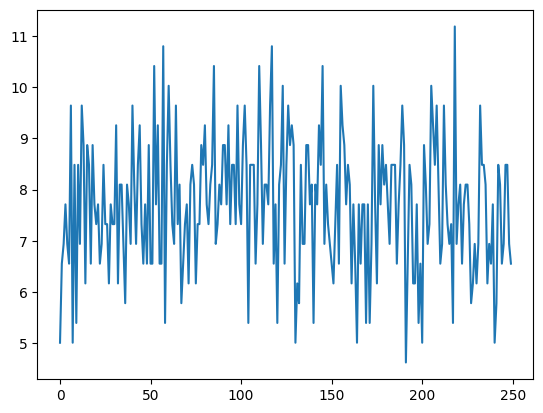

In [24]:
# Based on previous training loop, build your own to fit your linear model on the moon dataset
# An interesting set of parameters is:
# - batchsize = 50
# - n_epoch = 250
# - trainProcess = tf.keras.optimizers.SGD(0.01)
# Feel free to explore better settings

# Create the minimizer
trainProcess = tf.keras.optimizers.SGD(0.01)

# Train the model
loss_record = []
for epoch in range(250):
  # draw a random batch to fit on
  X, Y = get_random_batch(X_train, Y_train, 40)
  Y = Y.astype(float)
  with tf.GradientTape() as tape:
    # Model equation (use '@' operator)
    _estimation = estimate(X)
    # Compute error vector (mean squared error)
    _error = compute_loss(_estimation, Y)
  # record the loss
  loss_record.append(np.mean(_error))
  # get the gradients of your model
  _grads = tape.gradient(_error, [_w, _b], unconnected_gradients=tf.UnconnectedGradients.ZERO)
  # update your model by applying computed gradients
  trainProcess.apply_gradients(zip(_grads, [_w, _b]))

# plot loss record, estimations of 'a', 'b' next ot real values of 'a' and 'b'
print("value of parameter 'w': {}".format(_w.numpy()))
print("value of parameter 'b': {}".format(_b.numpy()))
plt.plot(loss_record)

####Check/plot the result and see separation drawn by the model

In [25]:
xx0 = np.linspace(-2.1,2.1,50)
xx1 = np.linspace(-2.1,2.1,50)
XX0, XX1 = np.meshgrid(xx0, xx1)
length = len(XX0.reshape(-1))
XX01 = np.stack([XX0.reshape(-1), XX1.reshape(-1)], axis=1)
XX01

array([[-2.1 , -2.1 ],
       [-2.01, -2.1 ],
       [-1.93, -2.1 ],
       ...,
       [ 1.93,  2.1 ],
       [ 2.01,  2.1 ],
       [ 2.1 ,  2.1 ]])

In [26]:
xx0 = np.linspace(-2.1,2.1,20)
xx1 = np.linspace(-2.1,2.1,2)
XX0, XX1 = np.meshgrid(xx0, xx1)
length = len(XX0.reshape(-1))
XX01 = np.stack([XX0.reshape(-1), XX1.reshape(-1)], axis=1)
print(XX01.shape)

(40, 2)


In [27]:
hat_Y_proba = estimate(XX01).numpy()

In [28]:
print(XX0.shape)

(2, 20)


(40, 2)


Text(0.5, 1.0, 'Model is good enough')

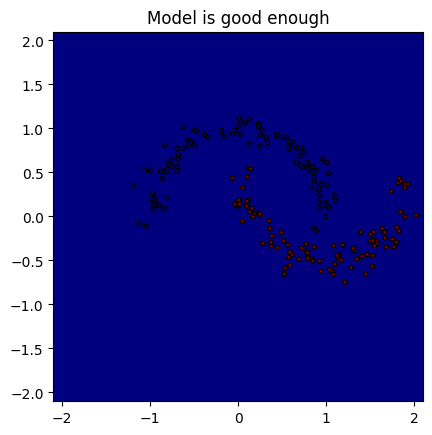

In [29]:
xx0 = np.linspace(-2.1,2.1,20)
xx1 = np.linspace(-2.1,2.1,2)
XX0, XX1 = np.meshgrid(xx0, xx1)
length = len(XX0.reshape(-1))
XX01 = np.stack([XX0.reshape(-1), XX1.reshape(-1)], axis=1)
print(XX01.shape)

hat_Y_proba = estimate(XX01).numpy()
#hat_Y_proba = hat_Y_proba.reshape(XX01.shape)

fig, ax = plt.subplots()
ax.imshow(hat_Y_proba, interpolation="nearest", origin="lower", cmap="jet", extent=[-2.1, 2.1, -2.1, 2.1])
ax.scatter(X_val[:,0], X_val[:,1], c=Y_val[:,0], cmap="jet", marker=".", edgecolors="k");
ax.set_title("Model is good enough")

##Multi-class classification

###Create a classification dataset

In [30]:
# Just a new dataset, nothing to be done
def spiral(N=2000, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K,dtype=np.int32)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    
    return X, y

int32
Training set has 4800 elements
Validation set has 1200 elements


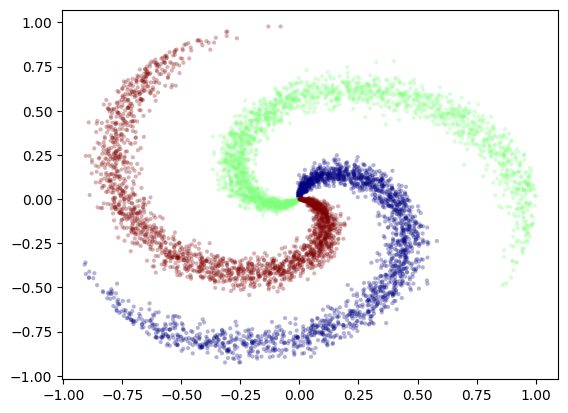

In [31]:
n_classes = 3
X, Y = spiral(K=n_classes)
print(Y.dtype)
fig,ax = plt.subplots()
ax.scatter(
      X[:,0],
      X[:,1],
      c=Y[:],
      marker=".", # small points
      alpha=0.3,
      linewidths=0, # no stroke
      cmap="jet"
  );
idx = list(range(len(X)))
np.random.shuffle(idx)
X = X[idx]
Y = Y[idx]
training, validation = split_dataset(X, Y)
print("Training set has {} elements".format(len(training[0])))
print("Validation set has {} elements".format(len(validation[0])))
X_train, Y_train = training
X_val, Y_val = validation

###Design a linear model

A linear model again. The difference here is that we won't be using the binary crossentropy on sigmoid output, but a multi-class crossentropy based on softmax output.

Feel free to read any source of explanation about multi-class crossentropy before you start ; but implementation will not be more difficult than previous example, you will only change the binary crossentropy by a `tf.nn.softmax_cross_entropy_with_logits` and remove the sigmoid function.

Another important thing is that you will have to one-hot encode your labels before you send them to the model using `tf.one_hot`.

In [32]:
n_inputs = 2
n_outputs= n_classes

_w = tf.Variable(tf.random.uniform([n_inputs, n_outputs], -0.1, 0.1))
_b = tf.Variable(tf.ones([n_outputs]))

def estimate(X):

  with tf.GradientTape() as tape:
      _estimation = (X @ _w + _b)
  return _estimation

def compute_loss(e, y):

  bce = tf.nn.softmax_cross_entropy_with_logits(axis=-1,
    name='multiclass_crossentropy'
  )
  return bce(e, y)

In [33]:
bce = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=estimate(X), axis=-1)

InvalidArgumentError: ignored

In [35]:
estimate(X)

<tf.Tensor: shape=(6000, 3), dtype=float32, numpy=
array([[1.01, 1.01, 1.02],
       [1.02, 1.  , 1.  ],
       [1.09, 1.01, 1.07],
       ...,
       [1.01, 1.  , 1.  ],
       [1.07, 1.  , 1.02],
       [0.96, 1.  , 0.99]], dtype=float32)>

In [36]:
Y

array([2, 1, 0, ..., 1, 2, 0], dtype=int32)

In [37]:
X, Y = get_random_batch(X_train, Y_train, 100)

In [38]:
Y

array([1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2], dtype=int32)

###Fit your model

In [40]:
trainProcess = tf.keras.optimizers.Adam(0.1)

# Train the model
loss_record = []
for epoch in range(200):
  # draw a random batch to fit on
  X, Y = get_random_batch(X_train, Y_train, 100)
  with tf.GradientTape() as tape:

    # Model equation (use '@' operator)
    _estimation = estimate(X)
    # Compute error vector (mean squared error)
    Y = tf.one_hot(indices=[0, 1], depth=2)
    _error = compute_loss(_estimation, Y)
  # record the loss
  loss_record.append(np.mean(_error))
  # get the gradients of your model
  _grads = tape.gradient(_error, [_w, _b], unconnected_gradients=tf.UnconnectedGradients.ZERO)
  # update your model by applying computed gradients
  trainProcess.apply_gradients(zip(_grads, [_w, _b]))

# plot loss record, estimations of 'a', 'b' next ot real values of 'a' and 'b'
print("value of parameter 'w': {}".format(_w.numpy()))
print("value of parameter 'b': {}".format(_b.numpy()))
plt.plot(loss_record)

# plot loss record, estimations of 'a', 'b' next ot real values of 'a' and 'b'

TypeError: ignored

###Check/plot the result and see separation drawn by the model

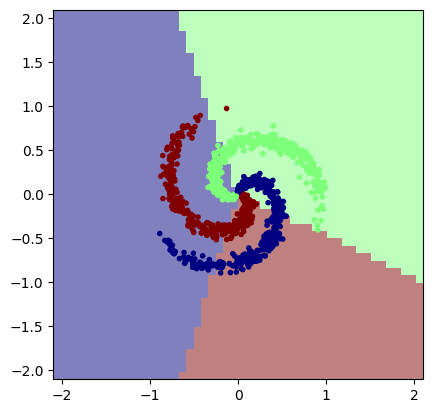

In [41]:
xx0 = np.linspace(-2.1,2.1,50)
xx1 = np.linspace(-2.1,2.1,50)
XX0, XX1 = np.meshgrid(xx0, xx1)
length = len(XX0.reshape(-1))
XX01 = np.stack([XX0.reshape(-1), XX1.reshape(-1)],axis=1)
# print(XX01.shape)

hat_Y_proba = estimate(XX01).numpy()
# hat_Y_proba.shape
hat_Y_proba = hat_Y_proba.reshape([50, 50, 3])
hat_Y = np.argmax(hat_Y_proba, axis=2)
# hat_Y.shape
fig, ax = plt.subplots()
ax.imshow(hat_Y, interpolation="nearest", origin="lower", cmap="jet", extent=[-2.1,2.1,-2.1,2.1], alpha=0.5)
ax.scatter(X_val[:,0], X_val[:,1], c=Y_val, cmap="jet", marker=".");

***Your turn:*** Based on what you've done on binary classification, try to build a more complex linear model with hidden layers and all !

## Working with hidden variables $\hookleftarrow$

In statistics, hidden variables problems are among the most difficult to solve. We are about to deal with a simple one using a tensorflow model. 

The algorithm used here is the EM (=Expectation–maximization).

### The 3 nests problem

Here is the problem: We measure the size of migratory birds' nests of 3 different species. We would like to know the mean diameter for each kind of bird.

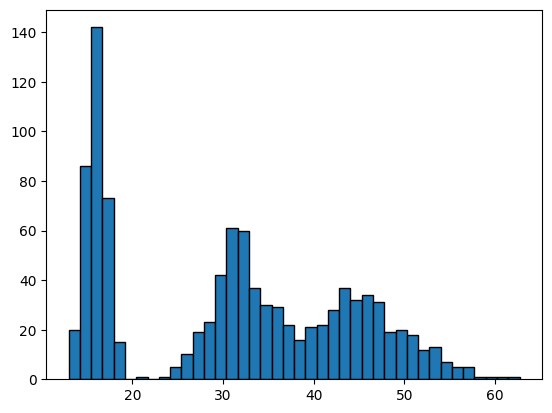

In [42]:
# This function was defined earlier, please do not check the data generation code,
# otherwise you'll know the correct values...
x_train=generate_nid()
plt.hist(x_train, bins=40, edgecolor="k");

####Design the model

Observe the data above, play with `x_train data` and try to find a mathematical expression to define the model of a nest. Gaussian is simple but efficient ;-)

In [43]:
# try to define a model, just like previous ones but here,
# you define a gaussian distributions
_mu = ...
_si = ...
# constraint on optimization, try to avoid stoopid values of sigma
clip_variance=_si.assign(tf.clip_by_value(_si, 1., 5.))

AttributeError: ignored

####Compute the loss

Here are some useful functions for the implementation of the expectation-maximization algorithm:

In [44]:
def Gauss(x,si):     
    return tf.exp(-0.5* (x/si) **2) /np.sqrt(2*np.pi)/si

def likelyhood(x,mu,si):
    return 1./3*Gauss(x-mu[0],si[0])+1./3*Gauss(x-mu[1],si[1])+1./3*Gauss(x-mu[2],si[2])

Define the loss and the estimation function
In expectation-maximization, we minimize -log(likelyhood)
mu and sigma are already considered as the estimation of the model. We do not have to 'compute' them. We just need to set-up the loss.


In [ ]:
def compute_loss(X):
  ...

####Train the model

Compute the training procedure !
Try to record the predictions too to plot the estimations

In [45]:
trainProcess = tf.keras.optimizers.Adam(0.1)

# Train the model
loss_record = []
# you will have to predict on a range
# to check that predicted distribution fit the data
x_test = np.linspace(0,80,200)
likelyhood_to_plot = []
for epoch in range(200):
  vars = [_mu, _si]
  with tf.GradientTape() as tape:
    ...
  # now predict the x_test to check visually if it's all right
  likelyhood_to_plot.append(likelyhood(x_test, _mu, _si))

# plot loss record, estimations of 'a', 'b' next ot real values of 'a' and 'b'
plt.plot(loss_record)

TypeError: ignored

This one takes some time to process, do not put too many training iterations, 200 is ok

In [46]:
nb = len(likelyhood_to_plot)
for i in range(nb):
    plt.figure()
    plt.plot(x_test, likelyhood_to_plot[i])
    plt.hist(x_train, bins=40, edgecolor="k", density=True);